### Fill out:
Name & Surname:

Student ID:

## W9&W10 post studio exercises (multivariate linear regression, regularisation)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas as pd

%matplotlib inline

## Exercises (Logistic regression)

In this exercise you are going to construct a simple one vs rest multiclass classifier based on the probabilities for each of the binary problems for the three iris species. A one-vs-rest classification scheme constructs multiple models (one for each class) where each model predicts a binary classification and combines the results to come up with a single prediction.

For this problem, only use the first two features, i.e., `sepal length` and `sepal width` (don't standardise/normalise/etc). 

The steps for this multiclass classifier are:

* Exercise 1: 
    * Create a new features dataframe which contains only the first two columns of the iris data frame. 
    * For each of the iris categories, i.e., species_setosa, species_versicolor, and species_virginica, model the data using Logistic Regression and calculate the probabilities for the testing set of the category being correct. Store these probabilites in an array (or dataframe). For each category you will need to re-do the train-test split, but make sure you use the same random state (random state 1). Alternatively, split the data set initially with all three labels, and then work on each category. The necessary one-hot encoding has already been performed.
    * Show first 5 (rows of) probabilities for all (3) species.
* Exercise 2: 
    * For each instance in feature space (testing set), choose the category with the highest probability. The function `numpy.argmax()` will be useful. Show first 5 entries for sepal_length, sepal_width, max probability and predicted class.
    * Plot the final classification for the testing set in feature space, with colours based on the predicted category.

**Exercises 1 - 2** below correspond to the two points outlined above.

Q: After completing the code below and inspecting the results, comment on which class(es) appear most difficult to predict accurately. Can you suggest any improvements to the model which might result in better accuracy?

In [77]:
iris = sns.load_dataset('iris') # load the dataset from seaborn

species_one_hots =  pd.get_dummies(iris.species, prefix = 'species')
iris = pd.concat([iris, species_one_hots], axis = 1)

### Exercise 1

In [80]:
# Part 1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Create a new features DataFrame with only the first two columns
features_df = iris_df.iloc[:, :2]

# Map the target variable to species names
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Initialize a dictionary to store probabilities
probabilities = {}

# Loop through each species
for species in ['setosa', 'versicolor', 'virginica']:
    # Define the target variable using the original species names
    y = (iris_df['species'] == species).astype(int)

    # Train-test split with the same random state
    X_train, X_test, y_train, y_test = train_test_split(features_df, y, test_size=0.3, random_state=1)

    # Initialize and train the Logistic Regression model
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)

    # Calculate probabilities for the test set
    probabilities[species] = model.predict_proba(X_test)[:, 1]

# Create a DataFrame to hold the probabilities
probabilities_df = pd.DataFrame(probabilities)
print(probabilities_df.head())

     setosa  versicolor  virginica
0  0.721045    0.039356   0.253861
1  0.312764    0.521245   0.094635
2  0.014710    0.323103   0.672858
3  0.875290    0.045163   0.132599
4  0.002022    0.091766   0.962402


### Exercise 2

   sepal_length  sepal_width  max_probability predicted_class
0           NaN          NaN         0.721045          setosa
1           NaN          NaN         0.521245      versicolor
2           NaN          NaN         0.672858       virginica
3           NaN          NaN         0.875290          setosa
4           NaN          NaN         0.962402       virginica


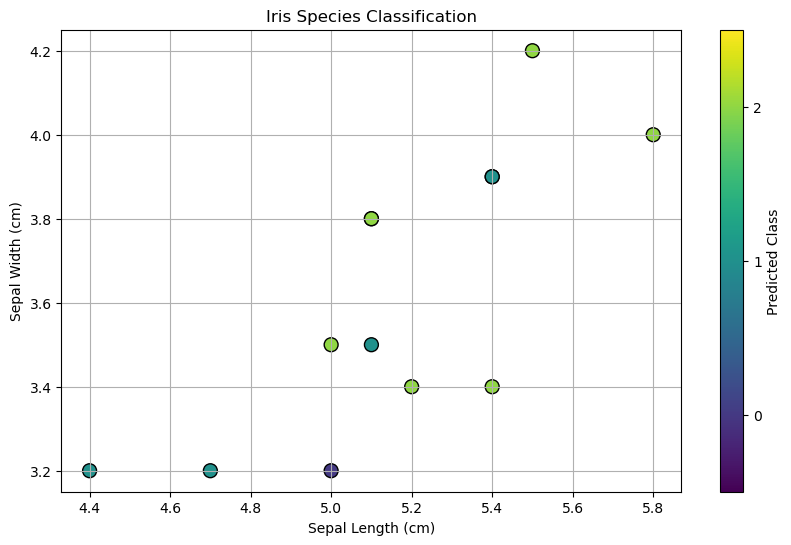

In [83]:
# Part 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

predicted_classes = predicted_classes.map({'setosa': 'setosa', 'versicolor': 'versicolor', 'virginica': 'virginica'})
results_df = pd.DataFrame({
    'sepal_length': X_test['sepal length (cm)'],
    'sepal_width': X_test['sepal width (cm)'],
    'max_probability': probabilities_df.max(axis=1),
    'predicted_class': predicted_classes
})

# Show the first 5 entries
print(results_df.head())

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(results_df['sepal_length'], results_df['sepal_width'], 
                      c=results_df['predicted_class'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}),
                      cmap='viridis', edgecolor='k', s=100)

# Add a colorbar with labels
plt.colorbar(scatter, ticks=[0, 1, 2], label='Predicted Class')
plt.clim(-0.5, 2.5)
plt.title('Iris Species Classification')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid()
plt.show()

## Exercises (Decision trees)

For these exercises we will model a dataset of the properties of wheat seeds, which you can download from GitLab: 

[seeds_dataset](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/blob/main/Machine-Learning/Supervised-Methods/Decision-Trees/seeds_dataset.csv)

This is originally from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/seeds). The seedtype is an integer (1, 2, or 3) corresponding to the three classes `Kama`, `Rosa` and `Canadian` in the classes list below.

Run all the cells below before writing your solutions; don't standardise/normalise/etc.

In [51]:
seeds = pd.read_csv('seeds_dataset.csv', header=None, 
                   names=['area','perimeter','compactness','length','width','asymmetry',
                         'groovelength','seedtype'])
classes = ['Kama', 'Rosa', 'Canadian']

In [53]:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry,groovelength,seedtype
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Split the data into features and labels, and into a training and testing set.

In [56]:
X_ex = seeds.drop('seedtype', axis = 1)
y_ex = seeds['seedtype']

X_train, X_test, y_train, y_test = train_test_split(
    X_ex, y_ex, random_state = 42
)

### Exercise 3

Create a simple Decision Tree of maximum depth=3 and fit the training data to this model.

Plot the decision tree for this model, and identify the most significant features for the classification of this dataset.

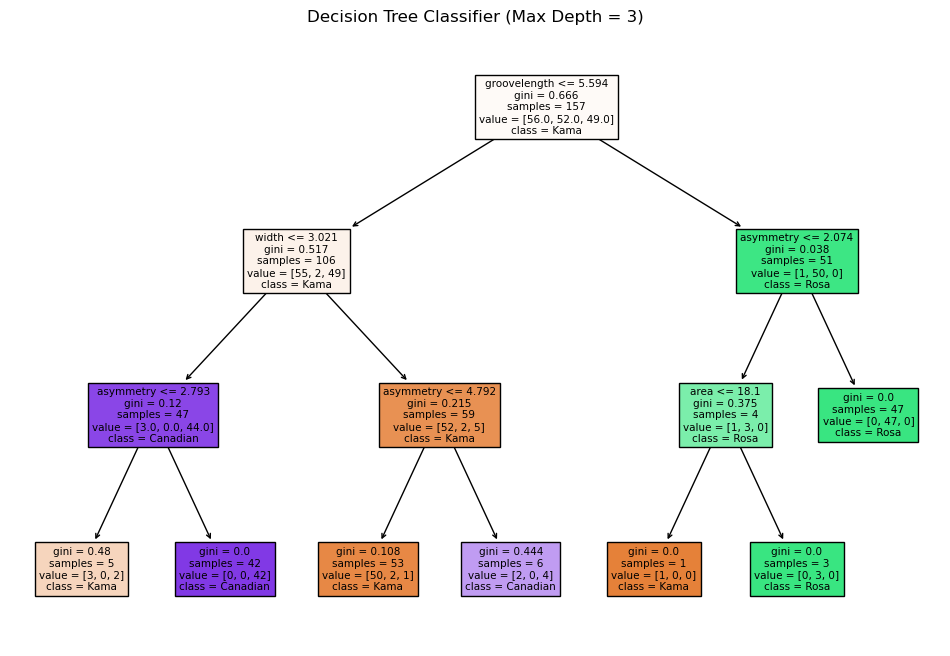

Feature Importances:
        Feature  Importance
6  groovelength    0.509836
4         width    0.389283
5     asymmetry    0.084874
0          area    0.016007
1     perimeter    0.000000
2   compactness    0.000000
3        length    0.000000


In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_ex, y_ex, random_state=42)

# Create and fit the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X_ex.columns, class_names=classes, filled=True)
plt.title('Decision Tree Classifier (Max Depth = 3)')
plt.show()

# Identify the most significant features
importances = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_ex.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

### Exercise 4

Plot the confusion matrix for this model, and calculate the accuracy.

Accuracy: 0.89
Unique classes in y_test: [1 3 2]


<Figure size 800x600 with 0 Axes>

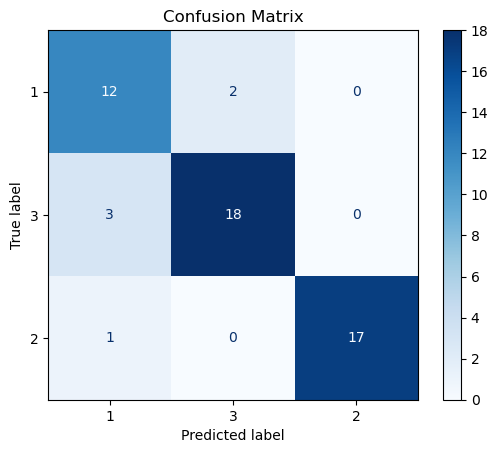

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ex, y_ex, random_state=42)

# Create and fit the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Check unique classes in y_test
unique_classes = y_test.unique()
print("Unique classes in y_test:", unique_classes)

# Plot confusion matrix with dynamic labels
cm = confusion_matrix(y_test, y_pred, labels=unique_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()